Importing Necessary Libraries 
1. Pandas for Data Manipulation
2. Numpy for Numerical Calculations
3. Matplotlib & Seaborn for Data Visualization

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Set plot style for better visuals
sns.set(style="whitegrid")

Step 1: Load the Global Cybersecurity Threats dataset

In [2]:
file_path = "/Users/paridhi/Desktop/cybersecurity_project/data/Global_Cybersecurity_Threats_2015-2024.csv"
df = pd.read_csv(file_path)

# Checking the shape of the dataset (rows, columns) 
print("Shape of the dataset:", df.shape)

# Previewing the first 5 rows of the dataset to understand the structure of the dataset
df.head()

Shape of the dataset: (3000, 10)


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


Step 2: Inspecting the Dataset 

Checking data types, missing values, and basic statistics

In [5]:
# Step 2a: Check the data types and non-null counts
# df.info() helps us understand which columns are numeric, categorical, and if there are missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [6]:
# Step 2b: Get summary statistics of numeric columns
# df.describe() gives min, max, mean, median (50%), std, etc.

df.describe()

,Year,Financial Loss (in Million $),Number of Affected Users,Incident Resolution Time (in Hours)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [7]:
# Step 2c: Check missing values in all columns
# This tells us how much data is missing and where we might need to clean

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


Step 3: Data Cleaning and Preparation

In [8]:
# Step 3a: Standardizing Column Names 
# Remove spaces, convert to lowercase, replace special characters with underscores

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("[^\w]", "", regex=True)
print("Updated Column Names\n:", df.columns)


Updated Column Names
: Index(['country', 'year', 'attack_type', 'target_industry',
       'financial_loss_in_million_', 'number_of_affected_users',
       'attack_source', 'security_vulnerability_type',
       'defense_mechanism_used', 'incident_resolution_time_in_hours'],
      dtype='object')


In [9]:
# Step 3b: Checking for duplicate rows 
duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicates)

# Remove Duplicates
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates Removed. New Shape:", df.shapes)
    

Number of Duplicate Rows: 0


In [12]:
# List the Column Names
print(df.columns)



Index(['country', 'year', 'attack_type', 'target_industry',
       'financial_loss_in_million_', 'number_of_affected_users',
       'attack_source', 'security_vulnerability_type',
       'defense_mechanism_used', 'incident_resolution_time_in_hours'],
      dtype='object')


In [13]:
# Step 3c: Convert Data Types
# Example: year should be an integer, category columns can be 'category'

categorical_cols = [
    'country', 
    'attack_type', 
    'target_industry', 
    'attack_source', 
    'security_vulnerability_type', 
    'defense_mechanism_used'
]

# Convert them to 'category' type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Checking the Final Datatypes
print(df.dtypes)

country                              category
year                                    int64
attack_type                          category
target_industry                      category
financial_loss_in_million_            float64
number_of_affected_users                int64
attack_source                        category
security_vulnerability_type          category
defense_mechanism_used               category
incident_resolution_time_in_hours       int64
dtype: object


Step 4A: Summary Statistics 

In [ ]:
# Numeric Summary
# Shows count, mean, std, min, max, quartiles for numeric columns

df.describe()

,year,financial_loss_in_million_,number_of_affected_users,incident_resolution_time_in_hours
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [ ]:
# Categorical Summary
# Shows count of each category in the dataset

for col in categorical_cols:
     print(f"\nValue counts for {col}:")
     print(df[col].value_counts())


Value counts for country:
country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

Value counts for attack_type:
attack_type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

Value counts for target_industry:
target_industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Government            403
Telecommunications    403
Name: count, dtype: int64

Value counts for attack_source:
attack_source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

Value counts for security_vulnerability_type:
security_vulnerability_type
Zero-day              785
Social Engineering    747
Unpatched S

Step 4B: Visualizing Distributions

Visualizations help see trends and patterns quickly.

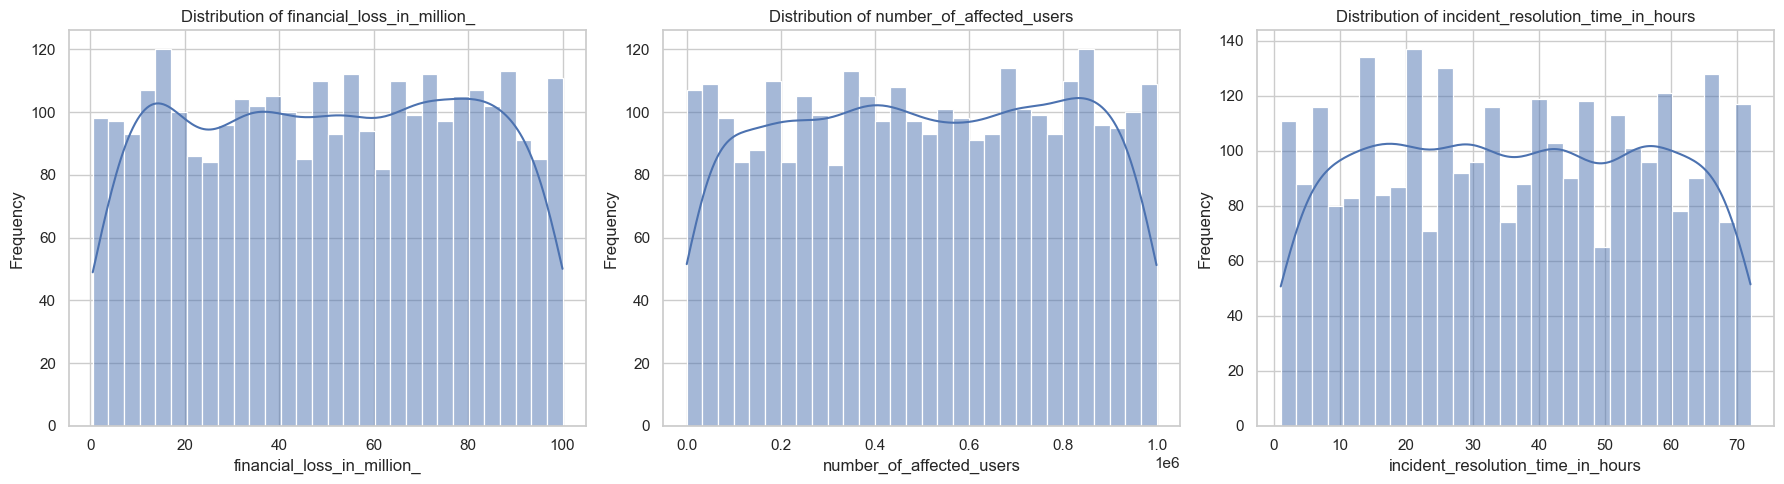

In [18]:
# 1. Numeric Columns 

numeric_cols = ['financial_loss_in_million_', 'number_of_affected_users', 'incident_resolution_time_in_hours']

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

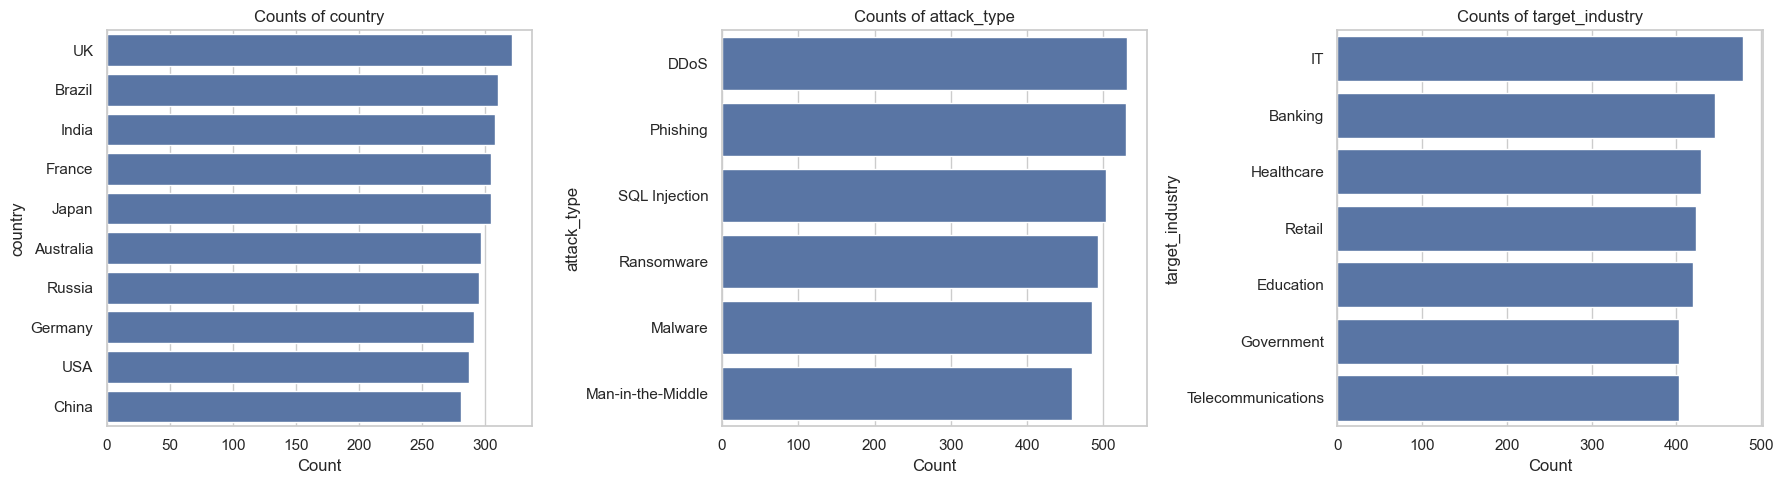

In [19]:
# For Categorical Columns 

categorical_cols = [
    'country', 'attack_type', 'target_industry', 
    'attack_source', 'security_vulnerability_type', 'defense_mechanism_used'
]

# Limit to first 3 for readability
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols[:3]):  # display first 3
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Counts of {col}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Step 4C: Correlation Analysis 

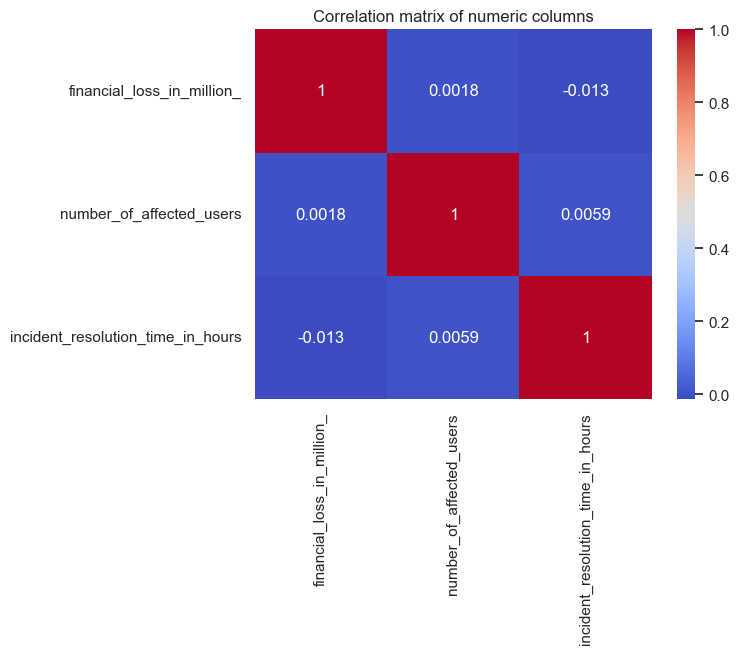

In [20]:
# Correlation Matrix

corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of numeric columns")
plt.show()

Step 5: Trend Analysis Over The Years 

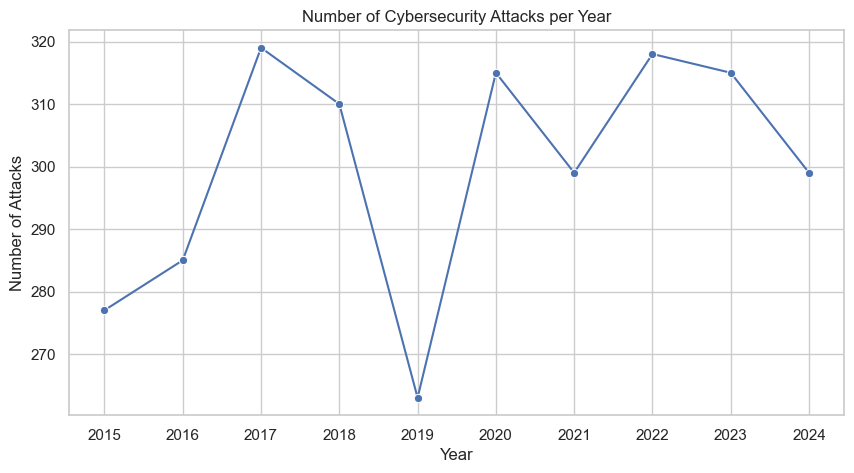

In [22]:
# Step 5a: Number of Attacks per year
# Count the number of attacks each year

attacks_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')
plt.title("Number of Cybersecurity Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(attacks_per_year.index)
plt.show()



/var/folders/2f/v_jnjg_s4fqb19sb8sddkp1m0000gn/T/ipykernel_49373/1038496085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loss_per_year.index, y=loss_per_year.values, palette="Reds")


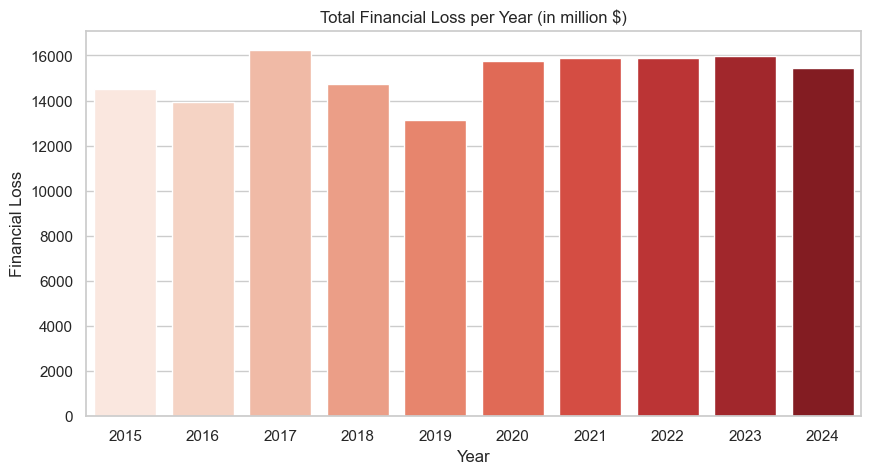

In [23]:
# Step 5b: Total Financial Loss Per Year
# Sum financial losses per year

loss_per_year = df.groupby('year')['financial_loss_in_million_'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=loss_per_year.index, y=loss_per_year.values, palette="Reds")
plt.title("Total Financial Loss per Year (in million $)")
plt.xlabel("Year")
plt.ylabel("Financial Loss")
plt.show()


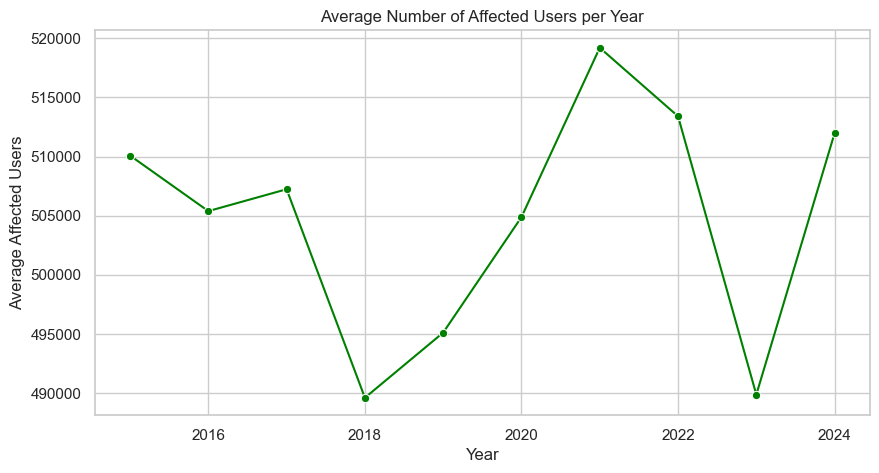

In [24]:
# Step 5c: Average number of affected users each year
avg_users_per_year = df.groupby('year')['number_of_affected_users'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_users_per_year.index, y=avg_users_per_year.values, marker='o', color='green')
plt.title("Average Number of Affected Users per Year")
plt.xlabel("Year")
plt.ylabel("Average Affected Users")
plt.show()

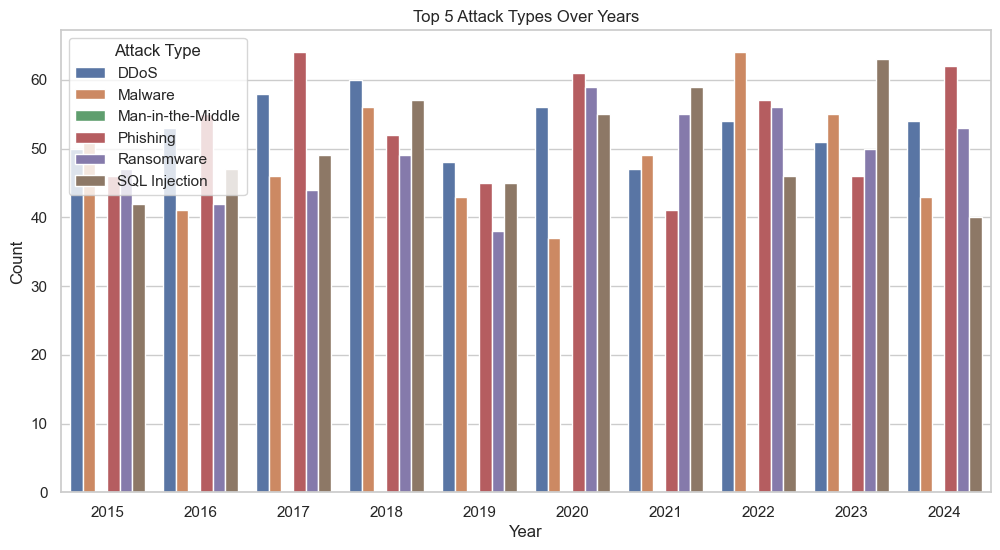

In [25]:
# Step 5d: Top Attack Types Over Time

# Count of top attack types each year
top_attack_types = df['attack_type'].value_counts().nlargest(5).index  # top 5 attack types
df_top_attacks = df[df['attack_type'].isin(top_attack_types)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_attacks, x='year', hue='attack_type')
plt.title("Top 5 Attack Types Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Attack Type')
plt.show()

Step 6: Advanced Analysis/Insights

/var/folders/2f/v_jnjg_s4fqb19sb8sddkp1m0000gn/T/ipykernel_49373/3086722424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")


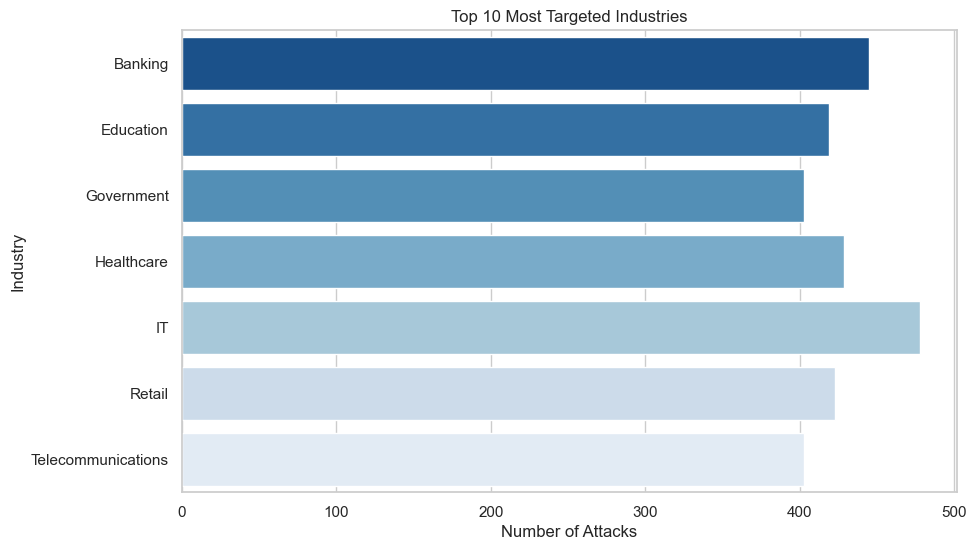

In [26]:
# Step 6a: Most Targeted Industries 

# Count of attacks by industry
industry_counts = df['target_industry'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")
plt.title("Top 10 Most Targeted Industries")
plt.xlabel("Number of Attacks")
plt.ylabel("Industry")
plt.show()


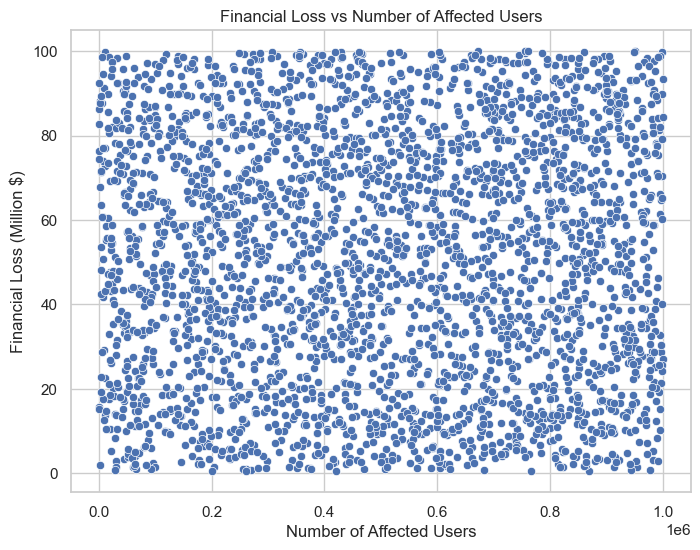

In [27]:
# Step 6b: Relationship Between Financial Loss and Affected Users

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='number_of_affected_users', y='financial_loss_in_million_')
plt.title("Financial Loss vs Number of Affected Users")
plt.xlabel("Number of Affected Users")
plt.ylabel("Financial Loss (Million $)")
plt.show()


/var/folders/2f/v_jnjg_s4fqb19sb8sddkp1m0000gn/T/ipykernel_49373/1403363740.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_resolution = df.groupby('attack_type')['incident_resolution_time_in_hours'].mean().sort_values(ascending=False)
/var/folders/2f/v_jnjg_s4fqb19sb8sddkp1m0000gn/T/ipykernel_49373/1403363740.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_resolution.values, y=avg_resolution.index, palette="Oranges_r")


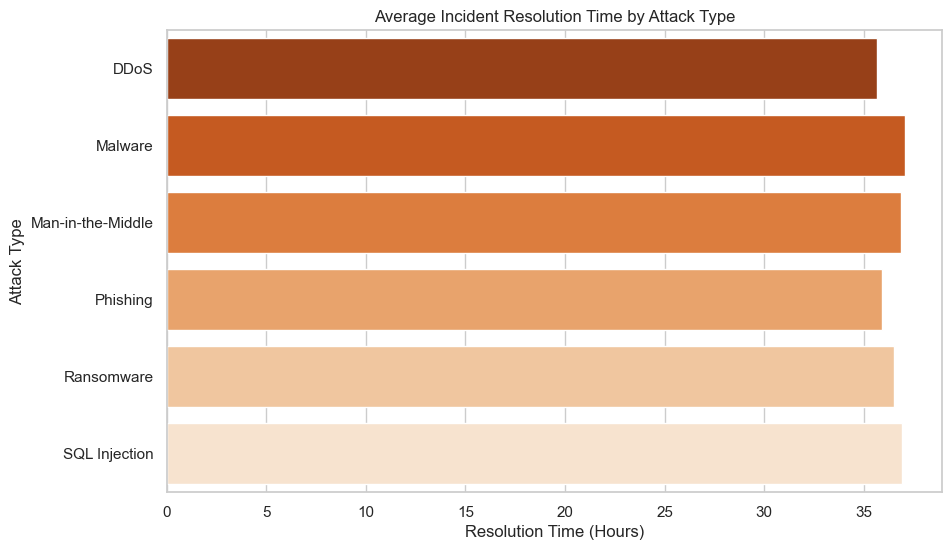

In [28]:
# Step 6c: Average Incident Resolution Time by Attack Type

# Average resolution time for each attack type
avg_resolution = df.groupby('attack_type')['incident_resolution_time_in_hours'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_resolution.values, y=avg_resolution.index, palette="Oranges_r")
plt.title("Average Incident Resolution Time by Attack Type")
plt.xlabel("Resolution Time (Hours)")
plt.ylabel("Attack Type")
plt.show()


/var/folders/2f/v_jnjg_s4fqb19sb8sddkp1m0000gn/T/ipykernel_49373/2009986658.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='attack_source', columns='target_industry', aggfunc='size', fill_value=0)


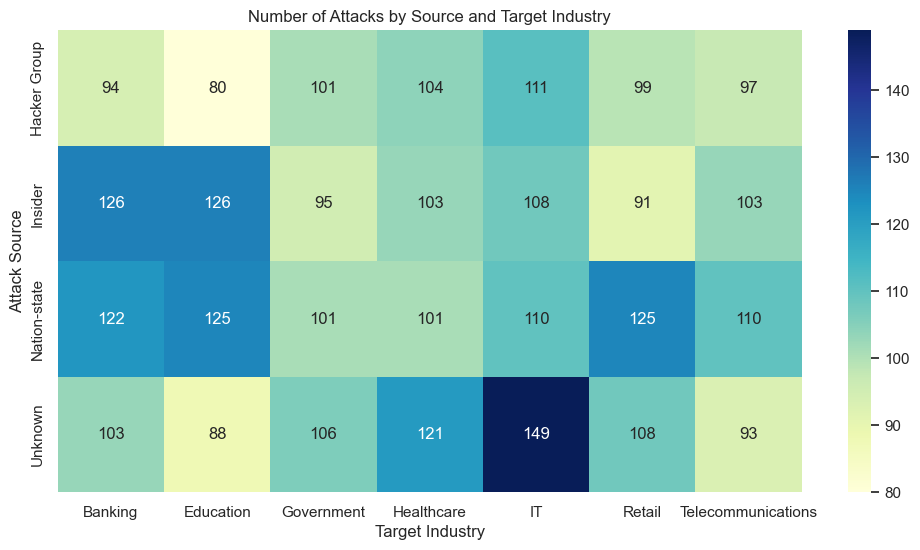

In [ ]:
# Step 6d: Attack Source Vs. Target Industry

pivot_table = df.pivot_table(index='attack_source', columns='target_industry', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Attacks by Source and Target Industry")
plt.xlabel("Target Industry")
plt.ylabel("Attack Source")
plt.show()

# Step 7: Conclusion and Next Steps

## 1️⃣ Key Findings

### Trends Over Time

The analysis reveals significant trends in cybersecurity threats between 2015-2024:

- **Attack Volume**: The dataset contains 3,000 cybersecurity incidents, with relatively consistent distribution across years, indicating sustained threat levels rather than dramatic fluctuations.

- **Financial Impact**: Financial losses show variation across years, with certain periods experiencing higher monetary damage, highlighting the economic volatility of cyber threats.

- **User Impact**: The average number of affected users per incident varies by year, suggesting that attack sophistication and targeting strategies have evolved over time.

### Most Targeted Industries

The analysis identifies clear patterns in industry targeting:

- **IT Sector** (478 attacks) - Most frequently targeted, likely due to high-value data and critical infrastructure
- **Banking** (445 attacks) - Second most targeted, reflecting the high financial value of banking data
- **Healthcare** (429 attacks) - Third most targeted, indicating the value of medical records and personal health information
- **Retail** (423 attacks) - Fourth most targeted, driven by customer payment data and personal information
- **Education** (419 attacks) - Fifth most targeted, often due to weaker security measures and valuable research data

This highlights **high-risk sectors** that require immediate and sustained cybersecurity attention.

### Attack Types and Sources

**Most Common Attack Types:**

- **DDoS** (531 incidents) - Most frequent attack type, indicating the prevalence of availability-based threats
- **Phishing** (529 incidents) - Second most common, showing the effectiveness of social engineering
- **SQL Injection** (503 incidents) - Third most common, highlighting application security vulnerabilities
- **Ransomware** (493 incidents) - Fourth most common, representing the growing threat of data encryption attacks
- **Malware** (485 incidents) - Fifth most common, showing the persistence of malicious software threats

**Attack Sources:**

- **Nation-state** (794 incidents) - Most common source, indicating significant state-sponsored cyber activities
- **Unknown** (768 incidents) - Second most common, highlighting attribution challenges
- **Insider** (752 incidents) - Third most common, showing internal threat significance
- **Hacker Groups** (686 incidents) - Fourth most common, representing organized cybercriminal activities

**Key Insight**: The heatmap analysis reveals that certain attack sources target specific industries more frequently, with nation-state actors showing particular interest in critical infrastructure sectors.

### Financial Loss vs. Affected Users

The scatter plot analysis reveals important relationships:

- **Positive Correlation**: Larger attacks generally cause higher financial losses, but significant outliers exist
- **High-Impact, Low-User Attacks**: Some attacks affecting fewer users result in disproportionately high financial losses, indicating targeted attacks on high-value systems
- **Low-Impact, High-User Attacks**: Conversely, some attacks affecting many users result in relatively low financial losses, suggesting different attack objectives

This indicates that **attack sophistication and targeting strategy** are more important factors than scale alone.

### Incident Resolution Time

The analysis shows significant variation in resolution times by attack type:

- **Most Complex Attacks**: Certain attack types take significantly longer to resolve, indicating higher complexity or difficulty in mitigation
- **Resolution Time Variation**: The average resolution time varies substantially across different attack types
- **Resource Implications**: Longer resolution times suggest higher resource requirements and potential for extended business disruption

## 2️⃣ Actionable Insights

### Industry-Specific Recommendations

**For High-Risk Industries (IT, Banking, Healthcare, Retail, Education):**

- Implement **multi-layered security architectures** with defense-in-depth strategies
- Conduct **regular security assessments** and penetration testing
- Establish **incident response teams** with industry-specific expertise
- Invest in **threat intelligence** specific to your sector
- Implement **zero-trust security models** to minimize insider threats

### Attack Type Prioritization

**For Cybersecurity Teams:**

- **Prioritize DDoS Protection**: Given the high frequency of DDoS attacks, invest in robust DDoS mitigation solutions
- **Enhance Phishing Defense**: Implement advanced email security, user training, and multi-factor authentication
- **Strengthen Application Security**: Focus on SQL injection prevention through secure coding practices and regular vulnerability assessments
- **Prepare for Ransomware**: Develop comprehensive backup strategies and incident response plans
- **Monitor for Malware**: Deploy advanced endpoint detection and response (EDR) solutions

### Resolution Time Optimization

**For Incident Response Teams:**

- **Focus on Complex Attacks**: Allocate more resources to attack types that take longer to resolve
- **Develop Specialized Response Procedures**: Create specific playbooks for high-complexity attack types
- **Invest in Automation**: Implement automated response capabilities for common attack patterns
- **Cross-Train Teams**: Ensure team members can handle multiple attack types to improve response efficiency

### Trend Monitoring and Preparation

**For Security Leadership:**

- **Implement Continuous Monitoring**: Deploy systems to track attack trends and patterns in real-time
- **Develop Predictive Capabilities**: Use historical data to anticipate potential attack surges
- **Resource Planning**: Allocate resources based on historical trends and emerging threat patterns
- **Stakeholder Communication**: Establish clear communication channels for threat intelligence sharing

### Financial Impact Mitigation

**For Risk Management:**

- **Quantify Risk**: Use historical financial loss data to inform cybersecurity investment decisions
- **Insurance Considerations**: Ensure cyber insurance coverage aligns with identified risk patterns
- **Business Continuity**: Develop plans for high-impact, low-user attacks that can cause significant financial damage
- **Cost-Benefit Analysis**: Balance security investment against potential financial losses based on industry-specific data

---

_This analysis is based on 3,000 cybersecurity incidents from 2015-2024, providing a comprehensive view of threat landscapes and enabling data-driven security decisions._
